In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
!pip install scikit-image

In [14]:
# dataDir='..'
# dataType='val2017'
# annFile='/home/oggy/Desktop/annotations/instances_train2014.json'
annFile='/home/oggy/Desktop/Hand-Detection-VinAI/Hand Data Format /CMU_dataset/Result Json/CMU_val2020.json'
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [15]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
hand

COCO supercategories: 
Body


{'file_name': 'ex1_3.flv_000040_r.jpg', 'width': 400, 'height': 300, 'id': 268, 'license': 1, 'flickr_url': '', 'coco_url': '', 'date_captured': '15/5/2020'}


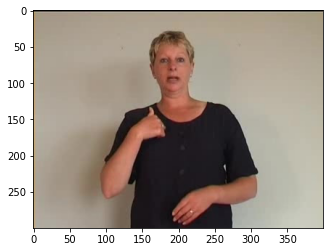

In [17]:
catIds = coco.getCatIds(catNms=['hand']);
imgIds = coco.getImgIds(catIds=catIds);

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(img)
I = io.imread('/home/oggy/Desktop/Hand-Detection-VinAI/Hand Data Format /CMU_dataset/val/image/%s'%(img['file_name']))
plt.figure()
plt.imshow(I)

[{'id': 268, 'category_id': 1, 'image_id': 268, 'iscrowd': 0, 'segmentation': [[]], 'area': 3802.8771641938997, 'bbox': [134.79100036621094, 119.52465820312497, 57.73866271972656, 65.86361694335946]}]


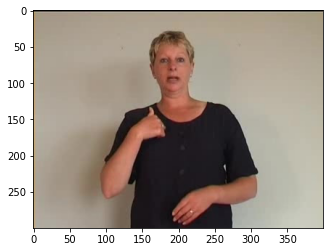

In [18]:
# load and display instance annotations
plt.imshow(I)
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)
print(anns)
coco.showAnns(anns)

In [19]:
anns[0]

{'id': 268,
 'category_id': 1,
 'image_id': 268,
 'iscrowd': 0,
 'segmentation': [[]],
 'area': 3802.8771641938997,
 'bbox': [134.79100036621094,
  119.52465820312497,
  57.73866271972656,
  65.86361694335946]}

Populating the interactive namespace from numpy and matplotlib


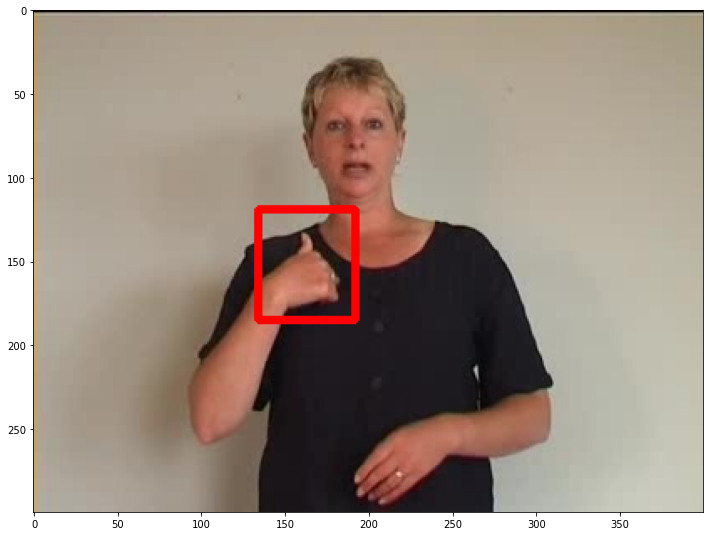

In [20]:
%pylab inline
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x_min, y_min, w, h = anns[0]['bbox']

x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
cv2.rectangle(I, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color=(255, 0, 0), thickness =4)
plt.figure(figsize=(12, 12))
plt.imshow(I)
